In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
figdir = '/Users/annabroido/Dropbox/Research/ICONProject/1Scale_Free_Networks/writing/Figures/'
df = pd.read_pickle('/Users/annabroido/Dropbox/Research/LRTAnalysis/LRTAnalysis/analysis/hyps.p')
orig = len(df)
# cut out those at 6.5
df = df.query('median_alpha<6.5')
final = len(df)
alphas = df.median_alpha.values
ns = df.n.values.astype('float')
ntails = df.median_ntail.values.astype('float')

In [3]:
from scipy.stats.stats import linregress
slope, intercept, r_value, p_value, std_err =linregress(np.log10(ns),alphas)
print(r_value)

0.244084036432


In [7]:
from scipy.stats.stats import pearsonr
pearsonr(np.log10(ns),alphas)

(0.24408403643174137, 4.4657635278297916e-13)

In [4]:
ALMOST_BLACK = '0.125'
DARK = '0.4'
GRAY_COLOR = '0.5'
ALL_COLOR = (0.156, 0.254, 0.466)
SUPERWEAK_COLOR = (0.647, 0.772, 0.972)
WEAKEST_COLOR = (0.419, 0.627, 0.960)
WEAK_COLOR = (0.258, 0.525, 0.85)
STRONG_COLOR = (0.223, 0.368, 0.674)
STRONGEST_COLOR = (0.156, 0.254, 0.466)
LABEL_SIZE = 20
TICK_SIZE = 20

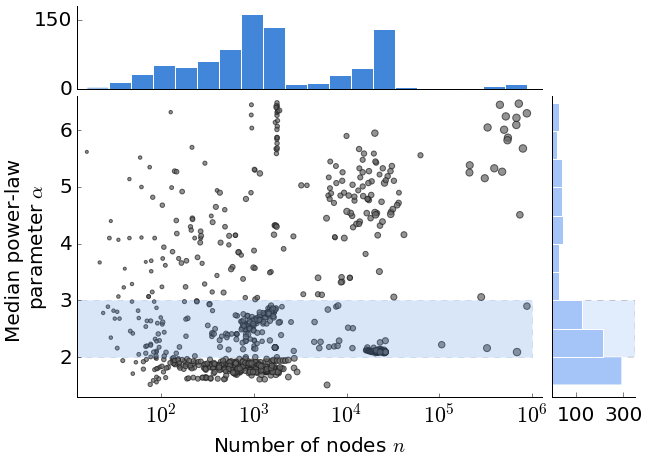

In [6]:
fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.scatter(np.log10(ns),alphas, s=10*np.log10(ntails), color=DARK, alpha=0.7, edgecolor=ALMOST_BLACK)

xmax = 6.1
x = np.arange(0,xmax,0.1)
bottom = 2
top = 3
ax.fill_between(x, bottom, top, color=WEAK_COLOR, alpha=0.2, linestyle='--')


divider = make_axes_locatable(ax)
ax2 = divider.append_axes("top", size=1.15, pad=.1, sharex=ax)    
ax2.hist(np.log10(ns), bins=20, color=WEAK_COLOR, edgecolor='w') 
ax2.spines["right"].set_visible(False)
ax2.spines["top"].set_visible(False)
# ax2.spines["left"].set_visible(False)
ax2.yaxis.set_ticks_position('left')
ax2.set_yticks([0, 150])
ax2.tick_params(axis=u'both', which=u'both',length=0) 
ax2.tick_params(axis=u'y', which=u'major',labelsize=TICK_SIZE, length=5, pad=5)
# ax2.tick_params(axis=u'both', which=u'both',length=0) 

# right histogram
ax3 = divider.append_axes("right", size=1.15, pad=0.15, sharey=ax)
#ax3.hist(alphas, bins=20, edgecolor=WEAKEST_COLOR,facecolor='w', orientation='horizontal')
ax3.hist(alphas, bins=10, facecolor=SUPERWEAK_COLOR,edgecolor='w', orientation='horizontal')
# add bar at 2-3
# ax3.plot([0,228],[bottom,bottom], '--', color=ALMOST_BLACK)
# ax3.plot([0,228],[top,top], '--', color=ALMOST_BLACK)
ax3.fill_between(np.arange(0,350,0.1), bottom, top, facecolor=WEAKEST_COLOR,  alpha=0.2, linestyle='--')
ax3.spines["right"].set_visible(False)
ax3.spines["top"].set_visible(False)
#ax3.spines["bottom"].set_visible(False)
ax3.xaxis.set_ticks_position('bottom')
ax3.set_xticks([100,300])
ax3.tick_params(axis=u'both', which=u'both',length=0) 
ax3.tick_params(axis=u'x', which=u'major',labelsize=TICK_SIZE, length=5, pad=8)



ax.set_xticks([1, 2, 3, 4, 5, 6])
ax.set_xticklabels([r'$10^1$', r'$10^2$', r'$10^3$', r'$10^4$', r'$10^5$',r'$10^6$'])
ax.set_yticklabels([1,2,3,4,5,6])
ax.set_xlim(1.1,xmax)
ax.set_ylim(1.3,6.6)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ylab = "Median power-law \n"+r"parameter $\alpha$"
ax.set_ylabel(ylab, fontsize=LABEL_SIZE, labelpad=10)
ax.set_xlabel(r'Number of nodes $n$', fontsize=LABEL_SIZE, labelpad=10)
ax.tick_params(axis='y', which='major', labelsize=TICK_SIZE, pad=5)
ax.tick_params(axis='x', which='both', labelsize=TICK_SIZE+2, pad=5)
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
plt.setp(ax2.get_xticklabels(), visible=False)
plt.setp(ax3.get_yticklabels(), visible=False)
plt.savefig(figdir + 'scatterplot.png', bbox_inches='tight', dpi=1000)
plt.show()

In [242]:
1-(orig-final)/float(orig)

0.9234088457389429

In [ ]:
# new colors:
weak = (0.258, 0.529, 0.850)